# Laborator 4: Algoritmi Evolutivi cu DEAP

√én acest laborator vom explora cum sƒÉ implementƒÉm algoritmi evolutivi folosind biblioteca [DEAP](https://github.com/DEAP/deap) (Distributed Evolutionary Algorithms in Python), detaliind totodatƒÉ metode precum Strategiile Evolutive (ES), care sunt special concepute pentru probleme de optimizare √Æn spa»õii continue, oper√¢nd cu variabile reale."

Familia metodelor de inspira»õie biologicƒÉ √Æn general »ôi a algoritmilor evolutivi √Æn particular este vastƒÉ, exist√¢nd multe versiuni cu diferite proprietƒÉ»õi »ôi caracteristici. √énsƒÉ, aceste metode √ÆmpƒÉrtƒÉ»ôesc acelea»ôi principii de operare »ôi componente comune:

*   **Schema de reprezentare a solu»õiilor (cromozomul)**: Define»ôte cum este codificatƒÉ o poten»õialƒÉ solu»õie la problemƒÉ. Aceasta poate fi un »ôir binar, un vector de numere reale, o structurƒÉ arborescentƒÉ etc. Distingem √Æntre:
    *   **Genotip**: Reprezentarea internƒÉ a solu»õiei, asupra cƒÉreia ac»õioneazƒÉ operatorii evolutivi.
    *   **Fenotip**: Expresia externƒÉ a solu»õiei, forma √Æn care este evaluatƒÉ √Æn contextul problemei.
*   **Operatori de varia»õie**: Mecanisme care introduc diversitate √Æn popula»õia de solu»õii, permi»õ√¢nd explorarea spa»õiului de cƒÉutare. Cei mai comuni sunt:
    *   **Operatori de √Æncruci»ôare (crossover)**: CombinƒÉ materialul genetic de la doi sau mai mul»õi pƒÉrin»õi pentru a crea unul sau mai mul»õi descenden»õi, baz√¢ndu-se pe principiul [ereditƒÉ»õii](https://ro.wikipedia.org/wiki/Ereditate).
    *   **Operatori de muta»õie**: Introduc modificƒÉri aleatoare mici √Æn genotipul unui individ, asigur√¢nd explorarea unor noi zone din spa»õiul solu»õiilor »ôi prevenind convergen»õa prematurƒÉ. A se vedea [muta»õie geneticƒÉ](https://ro.wikipedia.org/wiki/Muta%C8%9Bie_genetic%C4%83).
*   **O func»õie de adecvare (fitness)**: O func»õie obiectiv care mƒÉsoarƒÉ calitatea unei solu»õii candidat ([fitness function](https://en.wikipedia.org/wiki/Fitness_function)). Algoritmul evolutiv √ÆncearcƒÉ sƒÉ optimizeze aceastƒÉ func»õie (sƒÉ o maximizeze sau minimizeze, √Æn func»õie de problemƒÉ).
*   **O strategie de ghidare a procesului de cƒÉutare (selec»õie)**: Mecanismul prin care indivizii sunt ale»ôi pentru reproducere, pe baza valorii lor de fitness. Exemple includ:
    *   Selec»õia propor»õionalƒÉ cu fitness-ul (ruletƒÉ).
    *   Selec»õia bazatƒÉ pe ranguri.
    *   Selec»õia turnir.
*   **Parametrizarea »ôi strategia de evolu»õie**: Definirea modului √Æn care popula»õia evolueazƒÉ de la o genera»õie la alta. Aceasta include:
    *   Dimensiunea popula»õiei.
    *   NumƒÉrul de genera»õii.
    *   ProbabilitƒÉ»õile de aplicare a operatorilor de √Æncruci»ôare »ôi muta»õie.
    *   Modelul genera»õional (de exemplu, √Ænlocuirea pƒÉrin»õilor cu descenden»õii, pƒÉstrarea celor mai buni indivizi - elitism).


## Distributed Evolutionary Algorithms in Python (DEAP)

[DEAP](https://github.com/DEAP/deap) este o librƒÉrie Python versatilƒÉ »ôi puternicƒÉ, special conceputƒÉ pentru implementarea rapidƒÉ »ôi eficientƒÉ a algoritmilor evolutivi. Aceasta oferƒÉ o structurƒÉ modularƒÉ care simplificƒÉ definirea »ôi combinarea componentelor men»õionate mai sus.

**Avantajele DEAP:**

*   **Flexibilitate**: Permite definirea unor reprezentƒÉri customizate, operatori genetici proprii »ôi func»õii de fitness specifice problemei.
*   **Componente predefinite**: Include o gamƒÉ largƒÉ de instrumente »ôi algoritmi standard din literatura de specialitate (ex. diverse tipuri de selec»õie, √Æncruci»ôare, muta»õie).
*   **Paralelizare**: SuportƒÉ execu»õia paralelƒÉ a evaluƒÉrilor de fitness, acceler√¢nd procesul de optimizare.
*   **Extensibilitate**: Poate fi u»ôor extinsƒÉ pentru a include noi tehnici »ôi paradigme evolutive.

AceastƒÉ abordare modularƒÉ »ôi flexibilƒÉ a DEAP face posibilƒÉ adaptarea algoritmilor evolutivi la o gamƒÉ largƒÉ de probleme complexe.

## Instalarea pe ma»ôina virtualƒÉ Colab

Pentru a utiliza DEAP √Æn Google Colab, vom folosi comanda `pip install`:

In [ ]:
!pip install deap

## Importarea componentelor principale

DEAP are o structurƒÉ modularƒÉ. Vom importa componentele esen»õiale pentru a construi algoritmii no»ôtri:
*   [`creator`](https://deap.readthedocs.io/en/master/api/creator.html): meta-factory - permite crearea de noi clase, cum ar fi tipul de fitness »ôi tipul de individ.
*   [`base`](https://deap.readthedocs.io/en/master/api/base.html): Con»õine clasa [`Toolbox`](https://deap.readthedocs.io/en/master/_modules/deap/base.html#Toolbox), un container pentru func»õiile utilizate √Æn algoritm (generarea indivizilor, operatori etc.) »ôi alte func»õionalitƒÉ»õi de bazƒÉ.
*   [`tools`](https://deap.readthedocs.io/en/devel/api/tools.html): OferƒÉ o colec»õie de operatori genetici comuni (selec»õie, √Æncruci»ôare, muta»õie), func»õii pentru statistici »ôi gestionarea popula»õiei (ex. `HallOfFame`).
*   [`algorithms`](https://deap.readthedocs.io/en/master/api/algo.html): Con»õine implementƒÉri ale unor scheme de algoritmi evolutivi standard (ex. `eaSimple`, `eaMuPlusLambda`, `eaMuCommaLambda`).

In [ ]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Exemplu 1 de utilizare - Montarea / Adaptarea curbei (Curve Fitting)

[Adaptarea curbei](https://koaha.org/wiki/Curve_fitting) este procesul de construire / gƒÉsire a unei func»õii matematice care se potrive»ôte cel mai bine cu o serie de puncte de date observate, posibil supuse unor constr√¢ngeri.

√én acest exemplu, vom utiliza o metodƒÉ de tip **Strategie EvolutivƒÉ (ES - Evolution Strategy)** pentru a gƒÉsi coeficien»õii unei func»õii polinomiale. Vom presupune cƒÉ forma exactƒÉ a func»õiei este necunoscutƒÉ »ôi cƒÉ, pentru un input dat, putem observa doar o valoare evaluatƒÉ, perturbatƒÉ de zgomot.

Mai √Ænt√¢i, definim func»õia "adevƒÉratƒÉ" (`groundTruth`) pe care dorim sƒÉ o aproximƒÉm »ôi o func»õie `sample` care genereazƒÉ date observabile cu zgomot aditiv normal.


In [ ]:
import numpy as np
import random

# Func»õia originalƒÉ (necunoscutƒÉ algoritmului)
def groundTruth(x):
  return 1.42*x + 2.84*x**2 - 0.2*x**3 + 4.2 # Un polinom de grad 3

# Func»õia care genereazƒÉ date de antrenament; ie»ôirea este perturbatƒÉ de zgomot
def sample(inputs):
    # np.random.normal(loc=0.0, scale=2.0) adaugƒÉ un zgomot cu media 0 »ôi devia»õia standard 2.0.
    return np.array([groundTruth(inp) + np.random.normal(loc=0.0, scale=2.0) for inp in inputs])

# SƒÉ observƒÉm efectul zgomotului aditiv: pentru un input constant, ob»õinem rezultate diferite
# Vom folosi x=1 ca input constant.
input_constant_val = 1.0 # Valoarea de input pe care o vom testa
input_list_for_sample = [input_constant_val] # Func»õia sample a»ôteaptƒÉ o listƒÉ de inputuri

print(f"Exemple de valori observate pentru input x={input_constant_val} (cu zgomot):")
for i in range(0, 10):
  # ApelƒÉm sample cu lista care con»õine valoarea noastrƒÉ constantƒÉ
  print(sample(input_list_for_sample))

Exemple de valori observate pentru input x=1.0 (cu zgomot):
[9.93165817]
[8.22022637]
[8.02870262]
[5.93818457]
[9.4594194]
[12.13021123]
[9.30504183]
[3.54090939]
[9.71623742]
[7.51252555]


Pentru a modela »ôi optimiza acest proces folosind un algoritm evolutiv, trebuie sƒÉ definim ce tip de model cƒÉutƒÉm. Pentru exemplul actual, vom presupune cƒÉ »ôtim cƒÉ modelul pe care √Æl cƒÉutƒÉm este un polinom de cel mult gradul 4. Func»õia noastrƒÉ `groundTruth` este de gradul 3, deci algoritmul evolutiv ar trebui, ideal, sƒÉ determine coeficien»õii pentru termenii $x^k$ unde $k>3$ ca fiind apropia»õi de 0.

O solu»õie (un individ √Æn popula»õia noastrƒÉ) va fi reprezentatƒÉ de 5 numere reale: $[a_1, a_2, a_3, a_4, c]$, corespunz√¢nd coeficien»õilor polinomului $a_1x + a_2x^2 + a_3x^3 + a_4x^4 + c$.

In [ ]:
# Un individ (solu»õie) va fi reprezentat de 5 numere reale:
# [a1, a2, a3, a4, c] pentru polinomul a1*x + a2*x^2 + a3*x^3 + a4*x^4 + c
IND_SIZE = 5 # 4 coeficien»õi pentru x^1, x^2, x^3, x^4 »ôi un termen liber c

### Definirea tipului de fitness »ôi a individului

√éntr-un prim pas, definim tipul de problemƒÉ de optimizare (minimizare sau maximizare) »ôi structura unui individ.

*   `creator.create("FitnessMin", base.Fitness, weights=(-1.0,))`: Define»ôte o clasƒÉ numitƒÉ `FitnessMin`. Aceasta mo»ôtene»ôte din `base.Fitness` »ôi este configuratƒÉ pentru o problemƒÉ de minimizare a unui singur obiectiv. `weights=(-1.0,)` indicƒÉ faptul cƒÉ dorim sƒÉ minimizƒÉm valoarea de fitness (o valoare mai micƒÉ este mai bunƒÉ).

*   `creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)`: Define»ôte clasa `Individual`. Un individ va fi un `array.array` de numere reale de tip double (`typecode="d"`). FiecƒÉrui individ i se asociazƒÉ un atribut `fitness` de tipul `FitnessMin` definit mai sus.
    De asemenea, adƒÉugƒÉm un atribut `strategy`. √én Strategiile Evolutive, fiecare individ poate avea proprii parametri de strategie (ex. pasul de muta»õie) care co-evolueazƒÉ √ÆmpreunƒÉ cu solu»õia.

*   `creator.create("Strategy", array.array, typecode="d")`: Similar, definim o clasƒÉ `Strategy` pentru a stoca parametrii de strategie, tot ca un tablou de numere reale.

**De ce func»õia de fitness returneazƒÉ un tuplu »ôi rolul `weights`:**

Este crucial de √Æn»õeles cƒÉ **func»õiile de fitness √Æn DEAP trebuie sƒÉ returneze √Æntotdeauna un tuplu**, chiar »ôi atunci c√¢nd se optimizeazƒÉ un singur obiectiv. De exemplu:
```python
# √éntr-o func»õie de fitness pentru un singur obiectiv:
eroare_calculata = mse / len(data)
return eroare_calculata, # Virgula finalƒÉ creeazƒÉ un tuplu (eroare_calculata,)
```
AceastƒÉ cerin»õƒÉ se datoreazƒÉ faptului cƒÉ DEAP este proiectat sƒÉ gestioneze cu u»ôurin»õƒÉ »ôi probleme de optimizare multi-obiectiv, unde func»õia de fitness ar returna multiple valori (ex. `return cost, timp_executie,`). Prin standardizarea returnƒÉrii unui tuplu, DEAP men»õine o interfa»õƒÉ consistentƒÉ.

Parametrul `weights` utilizat la crearea tipului de fitness (ex. `creator.create("FitnessMin", base.Fitness, weights=(-1.0,))`) specificƒÉ direc»õia de optimizare pentru fiecare obiectiv.
*   `weights=(-1.0,)`: IndicƒÉ o problemƒÉ de **minimizare** pentru un singur obiectiv. O valoare mai micƒÉ a fitness-ului este consideratƒÉ mai bunƒÉ.
*   `weights=(1.0,)`: IndicƒÉ o problemƒÉ de **maximizare** pentru un singur obiectiv. O valoare mai mare a fitness-ului este consideratƒÉ mai bunƒÉ.
*   Pentru optimizare multi-obiectiv, `weights` va fi un tuplu cu mai multe valori, de exemplu, `weights=(-1.0, 1.0)` ar √Ænsemna minimizarea primului obiectiv »ôi maximizarea celui de-al doilea.

Prin urmare, virgula de la sf√¢r»ôitul instruc»õiunii `return` din func»õia de fitness nu este op»õionalƒÉ; ea asigurƒÉ cƒÉ valoarea returnatƒÉ este un tuplu, conform a»ôteptƒÉrilor DEAP.


In [ ]:
import array

# Dorim sƒÉ minimizƒÉm eroarea, deci definim un fitness de minimizare.
# 'weights' este un tuplu; (-1.0,) √ÆnseamnƒÉ cƒÉ minimizƒÉm o singurƒÉ func»õie obiectiv.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Definim structura unui individ: un tablou de numere reale ('d' - double).
# FiecƒÉrui individ i se asociazƒÉ un obiect de tip FitnessMin.
# AdƒÉugƒÉm »ôi un atribut 'strategy' pentru parametrii specifici Strategiilor Evolutive.
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)

# Definim structura pentru parametrii de strategie ai individului.
creator.create("Strategy", array.array, typecode="d")

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Ini»õializarea Toolbox-ului

DEAP folose»ôte un obiect `Toolbox` pentru a stoca func»õiile necesare generƒÉrii indivizilor, popula»õiei »ôi pentru aplicarea operatorilor evolutivi.

*   `generateES(individual_cls, strategy_cls, size)`: O func»õie custom pentru a genera un individ »ôi strategia sa. Coeficien»õii individului »ôi parametrii strategiei sunt ini»õializa»õi cu valori aleatoare dintr-o distribu»õie normalƒÉ.
*   `toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)`: √énregistreazƒÉ o func»õie alias `individual` √Æn toolbox. Apel√¢nd `toolbox.individual()`, se va executa `generateES` cu clasele `creator.Individual`, `creator.Strategy` »ôi dimensiunea `IND_SIZE`.
*   `toolbox.register("population", tools.initRepeat, list, toolbox.individual)`: √énregistreazƒÉ func»õia `population`. Aceasta va folosi `tools.initRepeat` pentru a crea o listƒÉ (`list`) de indivizi, apel√¢nd repetat `toolbox.individual` pentru a umple lista.

In [ ]:
# Func»õie pentru a genera un individ »ôi strategia sa asociatƒÉ.
# At√¢t coeficien»õii individului, c√¢t »ôi parametrii strategiei sunt ini»õializa»õi
# cu valori aleatoare dintr-o distribu»õie normalƒÉ (medie 0, devia»õie standard 1).
def generateES(individual_cls, strategy_cls, size):
    # GenereazƒÉ coeficien»õii pentru polinom
    ind = individual_cls(np.random.normal() for _ in range(size))
    # GenereazƒÉ parametrii de strategie (ex. pa»ôii de muta»õie pentru fiecare coeficient)
    ind.strategy = strategy_cls(np.random.normal() for _ in range(size))
    return ind

toolbox = base.Toolbox()

# √énregistrƒÉm func»õia de generare a unui individ »ôi a unei popula»õii.
# "individual" este un alias pentru func»õia generateES cu argumentele specificate.
toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)
# "population" este un alias pentru tools.initRepeat, care va crea o listƒÉ de indivizi.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### Generarea datelor de antrenament

Vom genera un set de date $(x, y)$ folosind func»õia `groundTruth` (fƒÉrƒÉ zgomot √Æn acest caz pentru a avea o referin»õƒÉ curatƒÉ, de»ôi am putea folosi `sample` pentru a simula date reale zgomotoase pentru evaluarea fitness-ului).

In [ ]:
# GenerƒÉm setul de date (x, y_adevƒÉrat) pe care vom √Æncerca sƒÉ-l aproximƒÉm.
# Vom folosi groundTruth direct pentru a avea o referin»õƒÉ clarƒÉ.
# √éntr-o problemƒÉ realƒÉ, am avea doar date observate (posibil zgomotoase).
data = []
for i in np.linspace(-5, 5, 1000): # 1000 de puncte √Æn intervalul [-5, 5]
  data.append([i, groundTruth(i)])

# Afi»ôƒÉm primele 5 perechi de date pentru verificare
print("Primele 5 puncte de date (x, groundTruth(x)):")
print(data[:5])


Primele 5 puncte de date (x, groundTruth(x)):
[[np.float64(-5.0), np.float64(93.10000000000001)], [np.float64(-4.98998998998999), np.float64(92.68036474893292)], [np.float64(-4.97997997997998), np.float64(92.2618986337673)], [np.float64(-4.96996996996997), np.float64(91.84460045089595)], [np.float64(-4.95995995995996), np.float64(91.42846899671162)]]


### Func»õia de Fitness

Func»õia de fitness evalueazƒÉ c√¢t de "bunƒÉ" este o solu»õie propusƒÉ (un individ). Pentru adaptarea curbei, o mƒÉsurƒÉ comunƒÉ este Eroarea PƒÉtraticƒÉ Medie (Mean Squared Error - MSE) √Æntre valorile prezise de polinomul individului »ôi valorile reale din setul de date.

*   `evaluatePolynomial(ind, x)`: CalculeazƒÉ valoarea polinomului definit de coeficien»õii din `ind` pentru un `x` dat.
*   `fitness(ind, data)`: CalculeazƒÉ MSE. ItereazƒÉ prin toate punctele `(x, y)` din `data`, calculeazƒÉ valoarea prezisƒÉ `val = evaluatePolynomial(ind, x)`, calculeazƒÉ eroarea pƒÉtraticƒÉ `(y - val)**2` »ôi apoi media acestor erori.
    **Important**: Func»õia de fitness √Æn DEAP trebuie sƒÉ returneze un tuplu (ex. `(mse_value,)`).

*   `toolbox.register("evaluate", fitness, data=data)`: √énregistreazƒÉ func»õia de evaluare. Argumentul `data=data` paseazƒÉ setul nostru de date cƒÉtre func»õia `fitness` de fiecare datƒÉ c√¢nd este apelatƒÉ prin `toolbox.evaluate(individ)`.

In [ ]:
# Func»õie care evalueazƒÉ polinomul dat de un individ pentru o valoare x
def evaluatePolynomial(individual_coeffs, x_val):
    y_predicted = 0.0
    # Termenii a_i * x^i
    for i in range(1, IND_SIZE): # Coeficien»õii de la ind la ind[IND_SIZE-2]
        y_predicted += individual_coeffs[i-1] * (x_val ** i)
    # Termenul liber c (constant)
    y_predicted += individual_coeffs[IND_SIZE-1] # Ultimul coeficient este termenul liber
    return y_predicted

# Func»õia de fitness: calculeazƒÉ eroarea pƒÉtraticƒÉ medie (MSE)
def fitness(individual_coeffs, data):
    mse = 0.0
    for x_coord, y_coord_true in data:
      val_predicted = evaluatePolynomial(individual_coeffs, x_coord)
      error = y_coord_true - val_predicted
      mse += error**2
    # ReturneazƒÉ un tuplu, a»ôa cum este cerut de DEAP
    return mse / len(data),

# √énregistrƒÉm func»õia de fitness √Æn toolbox.
# 'data=data' asigurƒÉ cƒÉ setul nostru de date este pasat ca argument func»õiei 'fitness'.
toolbox.register("evaluate", fitness, data=data)

### Parametrizarea algoritmului evolutiv

Acum, specificƒÉm operatorii genetici pe care dorim sƒÉ √Æi folosim. DEAP oferƒÉ implementƒÉri standard pentru mul»õi operatori. Documenta»õia completƒÉ poate fi gƒÉsitƒÉ [aici](https://deap.readthedocs.io/en/master/api/tools.html#operators).

Pentru Strategii Evolutive (ES), se folosesc adesea operatori specifici:
*   `toolbox.register("mate", tools.cxESBlend, alpha=0.1)`: √énregistreazƒÉ operatorul de √Æncruci»ôare `cxESBlend`. Acesta realizeazƒÉ o recombinare aritmeticƒÉ (blend) √Æntre doi indivizi pƒÉrin»õi »ôi strategiile lor. `alpha` controleazƒÉ c√¢t de mult poate un descendent sƒÉ difere de pƒÉrin»õii sƒÉi.
*   `toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)`: √énregistreazƒÉ operatorul de muta»õie `mutESLogNormal`. Acesta modificƒÉ mai √Ænt√¢i strategia (pa»ôii de muta»õie) »ôi apoi aplicƒÉ o muta»õie individului folosind noua strategie. Parametrul `c` este o constantƒÉ de √ÆnvƒÉ»õare, iar `indpb` este probabilitatea ca fiecare element al individului (coeficient) sƒÉ fie mutat.
*   `toolbox.register("select", tools.selTournament, tournsize=4)`: √énregistreazƒÉ operatorul de selec»õie `selTournament`. Selec»õia turnir alege aleatoriu `tournsize` indivizi din popula»õie »ôi selecteazƒÉ cel mai bun dintre ace»ôtia. Acest proces se repetƒÉ p√¢nƒÉ se formeazƒÉ noua popula»õie de pƒÉrin»õi.

In [ ]:
# √énregistrƒÉm operatorii genetici √Æn toolbox.

# Operatorul de √Æncruci»ôare (recombinare) specific pentru ES: cxESBlend.
# 'alpha' este un parametru al operatorului.
toolbox.register("mate", tools.cxESBlend, alpha=0.1)

# Operatorul de muta»õie specific pentru ES: mutESLogNormal.
# 'c' este o constantƒÉ de √ÆnvƒÉ»õare globalƒÉ.
# 'indpb' este probabilitatea independentƒÉ ca fiecare atribut (coeficient »ôi pas de muta»õie) sƒÉ fie mutat.
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)

# Operatorul de selec»õie: selec»õia turnir.
# 'tournsize' este numƒÉrul de participan»õi la fiecare turnir.
toolbox.register("select", tools.selTournament, tournsize=4)

### Colectarea statisticilor »ôi Hall of Fame

DEAP oferƒÉ modulul `Statistics` pentru a colecta »ôi afi»ôa date despre procesul de optimizare (evolu»õia fitness-ului minim, mediu, maxim etc. de-a lungul genera»õiilor).
`HallOfFame` este un instrument util pentru a pƒÉstra o copie a celor mai buni `k` indivizi gƒÉsi»õi vreodatƒÉ pe parcursul evolu»õiei.

In [ ]:
# ConfigurƒÉm obiectul pentru statistici.
# Acesta va colecta statistici despre valorile de fitness ale indivizilor.
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)  # Media fitness-ului
stats.register("std", np.std)   # Devia»õia standard a fitness-ului
stats.register("min", np.min)   # Fitness-ul minim
stats.register("max", np.max)   # Fitness-ul maxim

# ConfigurƒÉm HallOfFame pentru a re»õine cei mai buni 10 indivizi.
hof = tools.HallOfFame(10)

### Rularea algoritmului evolutiv

Vom folosi algoritmul `algorithms.eaMuCommaLambda`. Acesta este un algoritm standard √Æn Strategiile Evolutive. La fiecare genera»õie:
1.  Se genereazƒÉ `lambda_` descenden»õi din cei `mu` pƒÉrin»õi selecta»õi (prin √Æncruci»ôare »ôi muta»õie).
2.  Cei mai buni `mu` indivizi dintre cei `lambda_` descenden»õi sunt selecta»õi pentru a forma urmƒÉtoarea genera»õie de pƒÉrin»õi. PƒÉrin»õii din genera»õia anterioarƒÉ nu sunt direct transfera»õi (de aici "comma" √Æn nume).

Parametrii cheie:
*   `pop`: Popula»õia ini»õialƒÉ.
*   `toolbox`: Toolbox-ul configurat.
*   `mu`: NumƒÉrul de indivizi selecta»õi pentru a forma urmƒÉtoarea genera»õie.
*   `lambda_`: NumƒÉrul de descenden»õi genera»õi √Æn fiecare genera»õie. (Trebuie ca `lambda_ >= mu`).
*   `cxpb`: Probabilitatea de √Æncruci»ôare.
*   `mutpb`: Probabilitatea de muta»õie.
*   `ngen`: NumƒÉrul total de genera»õii.
*   `stats`: Obiectul de statistici.
*   `halloffame`: Obiectul HallOfFame.
*   `verbose=True`: Afi»ôeazƒÉ progresul.

In [ ]:
# CreƒÉm popula»õia ini»õialƒÉ.
pop_size = 100
pop = toolbox.population(n=pop_size)

# RulƒÉm algoritmul evolutiv eaMuCommaLambda.
# mu: numƒÉrul de indivizi selecta»õi pentru genera»õia urmƒÉtoare.
# lambda_: numƒÉrul de copii produ»ôi la fiecare genera»õie.
# cxpb: probabilitatea de √Æncruci»ôare.
# mutpb: probabilitatea de muta»õie individualƒÉ.
# ngen: numƒÉrul de genera»õii.
pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=100, lambda_=200,
                                          cxpb=0.6, mutpb=0.2, ngen=1000,
                                          stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg    	std    	min    	max   
0  	100   	43167.5	65624.4	254.843	327451
1  	149   	5058.79	5254.33	433.342	26213.7
2  	160   	998.17 	922.31 	76.9412	6301.75
3  	167   	302.195	175.555	76.5368	939.5  
4  	165   	155.941	57.0046	67.9515	441.416
5  	156   	113.244	27.4977	63.3922	182.713
6  	165   	86.2217	12.5434	65.3673	125.477
7  	164   	73.5157	6.90428	52.7397	88.4384
8  	157   	67.495 	3.94975	58.2693	78.476 
9  	162   	63.4068	2.87413	49.1634	72.9303
10 	161   	61.334 	1.90321	51.8327	63.787 
11 	155   	57.2499	4.79801	37.1246	63.4067
12 	150   	53.3084	4.22889	30.1047	60.84  
13 	156   	50.5033	3.09064	40.3291	56.0142
14 	165   	46.5378	2.66266	38.2812	52.0552
15 	159   	43.8732	2.76433	30.0199	49.3887
16 	157   	41.0343	2.92664	30.0199	44.4671
17 	157   	38.0374	2.73967	29.9369	42.8835
18 	163   	34.5973	3.15835	15.6347	40.6347
19 	154   	30.9019	3.9023 	15.6347	36.0943
20 	153   	26.4861	4.85794	15.6347	33.4123
21 	153   	23.1418	4.84187	14.9902	29.9465
22 	165   	18

### Afi»ôarea rezultatelor

DupƒÉ ce algoritmul a rulat, putem examina cei mai buni indivizi stoca»õi √Æn `HallOfFame`.

In [ ]:
print("\nCele mai bune solu»õii gƒÉsite:")


for i, sol_candidate in enumerate(hof):
  print(f"Solu»õia {i+1}: Coeficien»õi [a1, a2, a3, a4, c] = "
        f"[{sol_candidate[0]:.4f}, {sol_candidate[1]:.4f}, {sol_candidate[2]:.4f}, {sol_candidate[3]:.4f}, {sol_candidate[4]:.4f}] "
        f"are fitness (MSE) = {sol_candidate.fitness.values[0]}")

# Extragem cel mai bun individ
best_ind = hof[0]
print(f"\nCel mai bun individ are coeficien»õii: {best_ind.tolist()} »ôi fitness: {best_ind.fitness.values[0]}")

# Coeficien»õii originali (pentru compara»õie):
# groundTruth(x): return 1.42*x + 2.84*x**2 - 0.2*x**3 + 4.2
# a1=1.42, a2=2.84, a3=-0.2, a4=0.0, c=4.2
print(f"Coeficien»õii originali: a1=1.42, a2=2.84, a3=-0.2, a4=0.0, c=4.2")

# PregƒÉtim datele pentru plotare
x_values = [item[0] for item in data]
y_true_values = [item[1] for item in data] # Acestea sunt valorile groundTruth


# CalculƒÉm valorile f(x) folosind polinomul gƒÉsit de algoritmul evolutiv
y_predicted_values = [evaluatePolynomial(best_ind, x) for x in x_values]

print(y_predicted_values)




Cele mai bune solu»õii gƒÉsite:
Solu»õia 1: Coeficien»õi [a1, a2, a3, a4, c] = [1.3660, 2.8097, -0.1964, 0.0014, 4.2886] are fitness (MSE) = 0.009013340887575758
Solu»õia 2: Coeficien»õi [a1, a2, a3, a4, c] = [1.3659, 2.8096, -0.1964, 0.0014, 4.2901] are fitness (MSE) = 0.009028225581725544
Solu»õia 3: Coeficien»õi [a1, a2, a3, a4, c] = [1.3659, 2.8093, -0.1964, 0.0014, 4.2893] are fitness (MSE) = 0.009029139713393218
Solu»õia 4: Coeficien»õi [a1, a2, a3, a4, c] = [1.3663, 2.8096, -0.1964, 0.0014, 4.2902] are fitness (MSE) = 0.009029284530559711
Solu»õia 5: Coeficien»õi [a1, a2, a3, a4, c] = [1.3658, 2.8092, -0.1964, 0.0014, 4.2890] are fitness (MSE) = 0.00903015635109377
Solu»õia 6: Coeficien»õi [a1, a2, a3, a4, c] = [1.3659, 2.8094, -0.1964, 0.0014, 4.2899] are fitness (MSE) = 0.0090320754523032
Solu»õia 7: Coeficien»õi [a1, a2, a3, a4, c] = [1.3659, 2.8096, -0.1964, 0.0014, 4.2907] are fitness (MSE) = 0.009034759815678708
Solu»õia 8: Coeficien»õi [a1, a2, a3, a4, c] = [1.3664, 2.80

### Vizualizarea rezultatelor

SƒÉ plotƒÉm datele originale (`groundTruth`) »ôi curba aproximatƒÉ de cel mai bun individ gƒÉsit de algoritmul evolutiv.

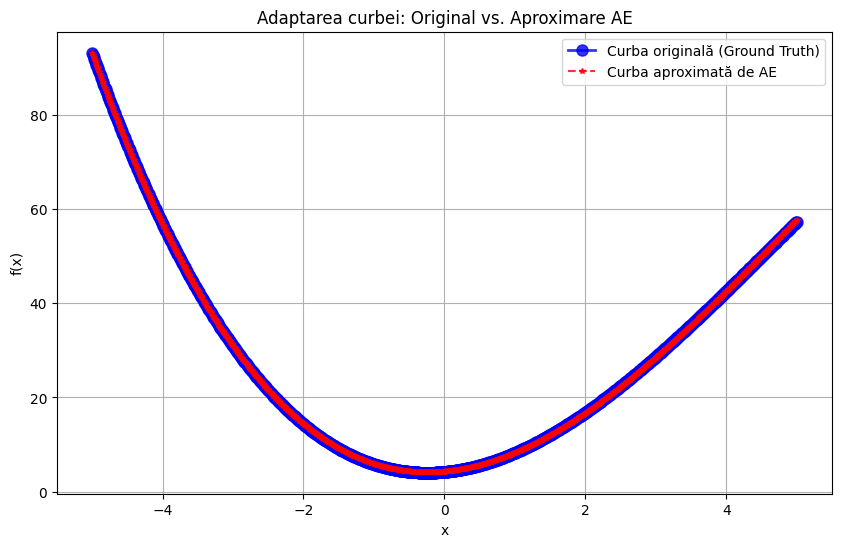

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# PlotƒÉm datele originale (curba groundTruth)
plt.plot(x_values, y_true_values, marker='o', linestyle='-', color='blue', alpha=0.8, markersize=8, linewidth=2, label='Curba originalƒÉ (Ground Truth)')

# PlotƒÉm aproxima»õia gƒÉsitƒÉ de algoritmul evolutiv
plt.plot(x_values, y_predicted_values, marker='*', linestyle='--', color='red', alpha=0.8, markersize=4, linewidth=1.5, label='Curba aproximatƒÉ de AE')

# √émbunƒÉtƒÉ»õim vizibilitatea graficului
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Adaptarea curbei: Original vs. Aproximare AE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Afi»ôƒÉm »ôi logbook-ul pentru a vedea evolu»õia statisticilor
print("\nLogbook (evolu»õia statisticilor de fitness pe genera»õii):")
print(logbook)


Logbook (evolu»õia statisticilor de fitness pe genera»õii):
gen 	nevals	avg       	std        	min       	max       
0   	100   	43167.5   	65624.4    	254.843   	327451    
1   	149   	5058.79   	5254.33    	433.342   	26213.7   
2   	160   	998.17    	922.31     	76.9412   	6301.75   
3   	167   	302.195   	175.555    	76.5368   	939.5     
4   	165   	155.941   	57.0046    	67.9515   	441.416   
5   	156   	113.244   	27.4977    	63.3922   	182.713   
6   	165   	86.2217   	12.5434    	65.3673   	125.477   
7   	164   	73.5157   	6.90428    	52.7397   	88.4384   
8   	157   	67.495    	3.94975    	58.2693   	78.476    
9   	162   	63.4068   	2.87413    	49.1634   	72.9303   
10  	161   	61.334    	1.90321    	51.8327   	63.787    
11  	155   	57.2499   	4.79801    	37.1246   	63.4067   
12  	150   	53.3084   	4.22889    	30.1047   	60.84     
13  	156   	50.5033   	3.09064    	40.3291   	56.0142   
14  	165   	46.5378   	2.66266    	38.2812   	52.0552   
15  	159   	43.8732   	2.76



---


## Strategii Evolutive ([ES - Evolution Strategy](https://en.wikipedia.org/wiki/Evolution_strategy))

Strategiile Evolutive (ES) reprezintƒÉ o sub-clasƒÉ importantƒÉ a algoritmilor evolutivi, dezvoltate ini»õial √Æn Germania √Æn anii '60 »ôi '70 de cƒÉtre Ingo Rechenberg »ôi Hans-Paul Schwefel. Ele sunt deosebit de potrivite pentru probleme de optimizare √Æn spa»õii continue, unde variabilele care definesc solu»õia sunt numere reale.

**Principii fundamentale ale ES:**

Spre deosebire de Algoritmii Genetici (AG) clasici, care s-au inspirat mai mult din genetica la nivel de cromozom binar »ôi operatori precum √Æncruci»ôarea »ôi muta»õia la nivel de bit, ES se concentreazƒÉ pe evolu»õia unor "strategii" de adaptare. Accentul principal √Æn ES este pus pe operatorul de **muta»õie**, considerat motorul principal al cƒÉutƒÉrii, √Æn timp ce **recombinarea (√Æncruci»ôarea)** joacƒÉ adesea un rol secundar sau este diferitƒÉ ca implementare fa»õƒÉ de GA-urile tradi»õionale.

O caracteristicƒÉ distinctivƒÉ »ôi puternicƒÉ a multor variante de ES este **auto-adaptarea parametrilor de strategie**. Aceasta √ÆnseamnƒÉ cƒÉ parametrii care controleazƒÉ procesul de muta»õie (de exemplu, mƒÉrimea pasului de muta»õie sau distribu»õia muta»õiilor) nu sunt fixa»õi static, ci sunt coda»õi √Æn genotipul individului »ôi evolueazƒÉ √ÆmpreunƒÉ cu solu»õia problemei. Astfel, algoritmul "√Ænva»õƒÉ" cum sƒÉ √Æ»ôi ajusteze explorarea spa»õiului de cƒÉutare pe mƒÉsurƒÉ ce se apropie de optim.

**Diferen»õe cheie fa»õƒÉ de Algoritmii Genetici (GA) clasici:**

| CaracteristicƒÉ        | Strategii Evolutive (ES)                                  | Algoritmi Genetici (GA) tradi»õionali                        |
| :-------------------- | :-------------------------------------------------------- | :---------------------------------------------------------- |
| **Reprezentare**      | Predominant **numere reale** (vectori de float/double).   | Adesea **»ôiruri binare**, dar »ôi alte reprezentƒÉri (√Æntregi, permutƒÉri). |
| **Operator principal**| **Muta»õia** (adesea gaussianƒÉ).                           | **√éncruci»ôarea** (crossover).                               |
| **Parametri strategie**| Frecvent **auto-adaptivi** (ex. pasul de muta»õie $\sigma$ co-evolueazƒÉ). | De obicei fic»ôi, stabili»õi la √Ænceput.                     |
| **Rolul recombinƒÉrii**| Secundar sau diferit (ex. recombinare discretƒÉ sau intermediarƒÉ a vectorilor de solu»õii »ôi a parametrilor de strategie). | Primar, esen»õial pentru combinarea blocurilor de construc»õie. |
| **Selec»õia pƒÉrin»õilor**| Mai pu»õin accent pe selec»õia probabilisticƒÉ a pƒÉrin»õilor pentru recombinare; recombinarea se face adesea √Æntre $\rho$ pƒÉrin»õi selecta»õi. | Selec»õie probabilisticƒÉ a pƒÉrin»õilor (ex. ruletƒÉ, turnir) pentru a forma perechi de √Æncruci»ôare. |
| **Selec»õia supravie»õuitorilor** | Tipic **deterministicƒÉ** »ôi distinctƒÉ de selec»õia pƒÉrin»õilor. DouƒÉ scheme principale: $(\mu, \lambda)$ »ôi $(\mu + \lambda)$. | Adesea probabilisticƒÉ sau bazatƒÉ pe √Ænlocuirea genera»õiei (elitismul poate fi prezent). |

**Reprezentarea √Æn ES:**

Un individ √Æntr-o ES este de obicei un vector de numere reale $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, reprezent√¢nd o solu»õie candidat. √én ES cu auto-adaptare, acest vector este extins pentru a include »ôi parametrii de strategie, de exemplu, devia»õiile standard pentru muta»õie $\mathbf{\sigma} = (\sigma_1, \sigma_2, \ldots, \sigma_n)$ sau chiar o matrice de covarian»õƒÉ pentru muta»õii corelate. Astfel, un individ complet ar putea fi $(\mathbf{x}, \mathbf{\sigma})$.

**Operatori √Æn ES:**

1.  **Muta»õia:** Este operatorul principal. Pentru fiecare componentƒÉ $x_i$ a solu»õiei, se adaugƒÉ o valoare aleatoare, adesea extrasƒÉ dintr-o distribu»õie normalƒÉ (gaussianƒÉ) cu media 0 »ôi o devia»õie standard $\sigma_i$.
    $x'_i = x_i + N(0, \sigma_i)$
    √én ES cu auto-adaptare, parametrii $\sigma_i$ sunt »ôi ei supu»ôi muta»õiei (de obicei prin √Ænmul»õire cu un factor log-normal) √Ænainte de a fi utiliza»õi pentru a muta $x_i$:
    $\sigma'_i = \sigma_i \cdot \exp(N(0, \tau_0) + N_i(0, \tau))$
    $x'_i = x_i + N(0, \sigma'_i)$
    unde $\tau_0$ »ôi $\tau$ sunt rate de √ÆnvƒÉ»õare globale, respectiv locale.

2.  **Recombinarea (√éncruci»ôarea):** AplicatƒÉ √Ænainte de muta»õie pentru a genera un descendent din mai mul»õi pƒÉrin»õi (adesea $\rho$ pƒÉrin»õi, unde $\rho$ poate varia, de ex., $\rho=2$ sau $\rho=\mu$). Tipuri comune:
    *   **Recombinare discretƒÉ:** Pentru fiecare componentƒÉ $x_i$ a descendentului, se alege aleator valoarea corespunzƒÉtoare de la unul dintre pƒÉrin»õi.
    *   **Recombinare intermediarƒÉ:** Componentele descendentului sunt calculate ca o medie (adesea aritmeticƒÉ) a componentelor corespunzƒÉtoare ale pƒÉrin»õilor. Ex: $x'_i = (p_{1,i} + p_{2,i}) / 2$.
    Recombinarea se poate aplica at√¢t variabilelor solu»õiei $\mathbf{x}$, c√¢t »ôi parametrilor de strategie $\mathbf{\sigma}$.

**Mecanisme de selec»õie »ôi parametrii ES:**

Selec»õia √Æn ES se referƒÉ la alegerea indivizilor care vor forma urmƒÉtoarea genera»õie de pƒÉrin»õi. Ea se bazeazƒÉ exclusiv pe rangul de fitness al indivizilor, nu pe valorile absolute ale fitness-ului. Principalii parametri care definesc acest proces sunt:

*   **$\mu$ (mu):** NumƒÉrul de **pƒÉrin»õi** selecta»õi pentru a forma genera»õia urmƒÉtoare. Ace»ôtia sunt cei mai buni indivizi.
*   **$\lambda$ (lambda):** NumƒÉrul de **descenden»õi** genera»õi √Æn fiecare genera»õie. Este necesar ca $\lambda \ge \mu$.
*   **$\rho$ (rho) (op»õional):** NumƒÉrul de pƒÉrin»õi implica»õi √Æn generarea unui singur descendent prin recombinare. Adesea $\rho \le \mu$.

ExistƒÉ douƒÉ scheme principale de selec»õie √Æn ES, care dau »ôi numele algoritmilor (utilizate »ôi √Æn DEAP, de exemplu `algorithms.eaMuCommaLambda` »ôi `algorithms.eaMuPlusLambda`):

1.  **$(\mu, \lambda)$-ES (selec»õie "comma"):**
    *   √én fiecare genera»õie, se genereazƒÉ $\lambda$ descenden»õi din cei $\mu$ pƒÉrin»õi ai genera»õiei curente (sau dintr-o popula»õie intermediarƒÉ creatƒÉ prin recombinarea celor $\mu$ pƒÉrin»õi).
    *   Cei $\mu$ pƒÉrin»õi ai genera»õiei urmƒÉtoare sunt selecta»õi **exclusiv** dintre cei $\lambda$ descenden»õi.
    *   PƒÉrin»õii genera»õiei curente sunt complet elimina»õi (nu concureazƒÉ direct cu descenden»õii pentru supravie»õuire).
    *   AceastƒÉ strategie permite o explorare mai bunƒÉ a spa»õiului de cƒÉutare »ôi poate ajuta la ie»ôirea din optimi locali, deoarece indivizii trebuie sƒÉ producƒÉ descenden»õi mai buni dec√¢t ei √Æn»ôi»ôi pentru ca linia lor geneticƒÉ sƒÉ continue. Durata de via»õƒÉ a unui individ este limitatƒÉ la o singurƒÉ genera»õie (ca pƒÉrinte sau ca descendent selectat).

2.  **$(\mu + \lambda)$-ES (selec»õie "plus"):**
    *   √én fiecare genera»õie, se genereazƒÉ $\lambda$ descenden»õi din cei $\mu$ pƒÉrin»õi ai genera»õiei curente.
    *   Cei $\mu$ pƒÉrin»õi ai genera»õiei urmƒÉtoare sunt selecta»õi dintre **uniunea** celor $\mu$ pƒÉrin»õi actuali **»ôi** a celor $\lambda$ descenden»õi (un total de $\mu + \lambda$ indivizi).
    *   AceastƒÉ strategie este elitistƒÉ prin natura sa: cei mai buni indivizi gƒÉsi»õi p√¢nƒÉ la un moment dat sunt garanta»õi sƒÉ supravie»õuiascƒÉ dacƒÉ nu sunt depƒÉ»ôi»õi de descenden»õi mai buni.
    *   Poate duce la o convergen»õƒÉ mai rapidƒÉ, dar »ôi la un risc mai mare de convergen»õƒÉ prematurƒÉ cƒÉtre un optim local.

**Parametrii algoritmului `eaMuCommaLambda` (»ôi similari) din DEAP:**

*   `mu`: NumƒÉrul de indivizi care vor supravie»õui »ôi vor forma popula»õia de pƒÉrin»õi pentru urmƒÉtoarea genera»õie.
*   `lambda_`: NumƒÉrul de descenden»õi care sunt genera»õi √Æn fiecare genera»õie.
*   `cxpb`: Probabilitatea de a aplica operatorul de √Æncruci»ôare (`mate`) asupra pƒÉrin»õilor pentru a genera un descendent. DacƒÉ nu se aplicƒÉ √Æncruci»ôarea, descendentul poate fi o clonƒÉ a unui pƒÉrinte (care apoi va fi supusƒÉ muta»õiei).
*   `mutpb`: Probabilitatea de a aplica operatorul de muta»õie (`mutate`) asupra unui individ descendent. √én multe implementƒÉri ES, muta»õia se aplicƒÉ aproape √Æntotdeauna (ex. `mutpb=1.0`).

Strategiile Evolutive, √Æn special variantele avansate precum [CMA-ES](https://en.wikipedia.org/wiki/CMA-ES) (Covariance Matrix Adaptation Evolution Strategy), sunt considerate printre cele mai performante metode de optimizare pentru probleme cu variabile reale, datoritƒÉ mecanismelor robuste de auto-adaptare a parametrilor de cƒÉutare.



---



## Exemplu 2 de utilizare - Rezolvarea unui sistem de ecua»õii liniare

√én acest exemplu, vom studia cum pot fi utiliza»õi algoritmii evolutivi pentru a aproxima solu»õiile (necunoscutele) √Æntr-un sistem de ecua»õii liniare.

### Sistem de douƒÉ ecua»õii cu douƒÉ necunoscute

Fie sistemul de ecua»õii liniare:

$\begin{cases} x + 2y = 4 \\ 4x + 4y = 12 \end{cases}$

Solu»õia exactƒÉ a acestui sistem este $x=4, y=0$. Vom √Æncerca sƒÉ gƒÉsim aceastƒÉ solu»õie folosind un algoritm evolutiv.

Avem nevoie de o func»õie de fitness care, pentru ni»ôte valori presupuse $(x, y)$ (reprezentate de un individ), evalueazƒÉ eroarea totalƒÉ. Eroarea poate fi definitƒÉ ca suma valorilor absolute ale diferen»õelor dintre membrii st√¢ngi »ôi cei drep»õi ai ecua»õiilor.
$err_1 = |(x + 2y) - 4|$
$err_2 = |(4x + 4y) - 12|$
$Fitness = err_1 + err_2$

Dorim sƒÉ minimizƒÉm aceastƒÉ func»õie de fitness (ideal, sƒÉ ajungƒÉ la 0).

In [ ]:
# Func»õia de eroare (fitness) pentru sistemul de ecua»õii
# 'genes' va fi o listƒÉ/tablou [x, y]
def error_system_2eq(genes):
  x = genes[0]
  y = genes[1]
  # Ecua»õia 1: x + 2y - 4 = 0
  err1 = x + 2 * y - 4
  # Ecua»õia 2: 4x + 4y - 12 = 0
  err2 = 4 * x + 4 * y - 12
  # Eroarea totalƒÉ este suma erorilor absolute (sau pƒÉtratice)
  totalErr = abs(err1) + abs(err2)
  # Func»õia de fitness trebuie sƒÉ returneze un tuplu
  return totalErr,

# TestƒÉm func»õia de eroare
print(f"Eroare pentru (0,0): {error_system_2eq([0,0])}")   # Se a»ôteaptƒÉ | -4 | + | -12 | = 16
print(f"Eroare pentru (1,2): {error_system_2eq([1,2])}")   # Se a»ôteaptƒÉ | 1+4-4 | + | 4+8-12 | = |1| + |0| = 1
print(f"Eroare pentru solu»õia corectƒÉ (2,1): {error_system_2eq([2,1])}") # Se a»ôteaptƒÉ 0

Eroare pentru (0,0): (16,)
Eroare pentru (1,2): (1,)
Eroare pentru solu»õia corectƒÉ (2,1): (0,)


### Definirea tipului de fitness »ôi a individului

Similar exemplului anterior, definim un fitness de minimizare »ôi un individ ca un tablou de numere reale. De data aceasta, strategia nu este explicit necesarƒÉ dacƒÉ folosim un algoritm genetic mai simplu, dar o vom men»õine pentru consisten»õƒÉ cu `generateES` »ôi operatorii ES.

In [ ]:
# Dorim sƒÉ minimizƒÉm func»õia de eroare.
# DacƒÉ FitnessMin nu a fost »ôters/modificat de celula anterioarƒÉ, nu e nevoie sƒÉ-l re-creƒÉm.
# Altfel, decomenta»õi:
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Reprezentarea unui individ: un »ôir (array) de numere reale (double).
# DacƒÉ Individual nu a fost »ôters/modificat, nu e nevoie sƒÉ-l re-creƒÉm.
# Altfel, decomenta»õi:
# creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
# creator.create("Strategy", array.array, typecode="d")

# Definim lungimea "cromozomului" (individului).
# Pentru sistemul actual (x, y), avem 2 necunoscute.
IND_SIZE_SYS = 2


### Ini»õializarea Toolbox-ului »ôi a operatorilor

Folosim aceea»ôi func»õie `generateES` »ôi √ÆnregistrƒÉm componentele √Æn `toolbox`. Func»õia de evaluare va fi `error_system_2eq`. Operatorii de √Æncruci»ôare, muta»õie »ôi selec»õie pot fi aceia»ôi ca √Æn exemplul anterior.

In [ ]:
toolbox_sys = base.Toolbox()

# Func»õii pentru generarea indivizilor »ôi a popula»õiei.
# ReutilizƒÉm generateES, dar cu noua dimensiune IND_SIZE_SYS.
toolbox_sys.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE_SYS)
toolbox_sys.register("population", tools.initRepeat, list, toolbox_sys.individual)

# √énregistrƒÉm func»õia de evaluare (fitness).
toolbox_sys.register("evaluate", error_system_2eq)

# Parametrii pentru algoritmul eaMuCommaLambda.
# Putem experimenta cu diferi»õi operatori sau parametri.
toolbox_sys.register("mate", tools.cxESBlend, alpha=0.1)
toolbox_sys.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)
toolbox_sys.register("select", tools.selTournament, tournsize=4)

### Rularea algoritmului »ôi afi»ôarea rezultatelor

In [ ]:
stats_sys = tools.Statistics(lambda ind: ind.fitness.values)
stats_sys.register("avg", np.mean)
stats_sys.register("std", np.std)
stats_sys.register("min", np.min)
stats_sys.register("max", np.max)

hof_sys = tools.HallOfFame(10) # Re»õinem cele mai bune 10 solu»õii

pop_sys_initial_size = 100
pop_sys = toolbox_sys.population(n=pop_sys_initial_size)

# RulƒÉm algoritmul. Putem ajusta numƒÉrul de genera»õii (ngen).
# Pentru probleme simple, un numƒÉr mic de genera»õii poate fi suficient.
pop_sys, logbook_sys = algorithms.eaMuCommaLambda(pop_sys, toolbox_sys, mu=100, lambda_=200,
                                                  cxpb=0.6, mutpb=0.2, ngen=500,
                                                  stats=stats_sys, halloffame=hof_sys, verbose=True)

# Afi»ôarea celor mai bune solu»õii gƒÉsite
print("\nCele mai bune solu»õii gƒÉsite pentru sistemul de ecua»õii:")
for i, sol_candidate in enumerate(hof_sys):
  print(f"Solu»õia {i+1}: [x={sol_candidate[0]:.6f}, y={sol_candidate[1]:.6f}] ",
        f"are fitness (eroare) = {sol_candidate.fitness.values[0]}")

print(f"\nSolu»õia exactƒÉ este x=2, y=1.")

gen	nevals	avg   	std    	min     	max    
0  	100   	16.614	7.56995	0.803975	39.8065
1  	150   	7.83447	4.92227	0.803975	21.3711
2  	169   	3.49028	2.63219	0.375981	10.6632
3  	153   	1.2291 	0.895049	0.198235	5.74775
4  	159   	0.582203	0.369715	0.0526714	2.2952 
5  	161   	0.327471	0.17575 	0.0467369	0.949319
6  	163   	0.161837	0.10833 	0.039243 	0.51888 
7  	162   	0.0831735	0.0487773	0.0157745	0.279505
8  	162   	0.0419294	0.0220758	0.0025626	0.0987309
9  	165   	0.0266389	0.0193089	0.0025626	0.0987268
10 	165   	0.0140541	0.0148637	0.000386101	0.0829461
11 	163   	0.00505635	0.0038601	0.000285314	0.0208764
12 	159   	0.0028049 	0.00170944	0.000817463	0.0100763
13 	162   	0.00159912	0.000903373	0.000214813	0.00617213
14 	160   	0.000962001	0.000521437	8.09855e-05	0.00248449
15 	165   	0.000561908	0.00030005 	7.77239e-05	0.00198307
16 	156   	0.000338925	0.000291977	2.51082e-05	0.0027415 
17 	158   	0.000183917	9.5799e-05 	1.88553e-05	0.00044018
18 	156   	8.69516e-05	6.39691e-05	

Observa»õi c√¢t de aproape ajung solu»õiile gƒÉsite de algoritmul evolutiv de solu»õia exactƒÉ $x=4, y=0$. Fitness-ul (eroarea) ar trebui sƒÉ fie foarte mic pentru cele mai bune solu»õii.

# Exerci»õii

1. Pentru exemplul de adaptare a curbei:

   a) **Compara»õie graficƒÉ √ÆmbunƒÉtƒÉ»õitƒÉ:** Modifica»õi codul de plotare pentru a afi»ôa pe acela»ôi grafic:
      *   Curba `groundTruth` (func»õia originalƒÉ).
      *   Punctele de date *zgomotoase* generate de func»õia `sample` (dacƒÉ a»õi folosi date zgomotoase pentru fitness).
      *   Curba aproximatƒÉ de cel mai bun individ gƒÉsit (`hof`).
      *   Op»õional: curbele aproximate de al»õi indivizi buni din `HallOfFame`.
      *   *Indica»õie:* Pentru a plota `groundTruth`, folosi»õi direct func»õia `groundTruth(x_values)`. Pentru datele zgomotoase, genera»õi-le folosind `sample(x_values)` »ôi plota»õi-le ca puncte (ex. `plt.scatter`).

   b) **Analiza convergen»õei »ôi calitƒÉ»õii solu»õiilor:** Cum este afectatƒÉ convergen»õa metodei »ôi calitatea solu»õiilor dacƒÉ:
      *   Probabilitatea de muta»õie (`mutpb` √Æn `algorithms.eaMuCommaLambda`) este (mult) redusƒÉ (ex. la 0.01 sau 0.0)? Ce se √Ænt√¢mplƒÉ dacƒÉ este (mult) crescutƒÉ (ex. la 0.8 sau 1.0)?
          *   *Experimenta»õi:* Modifica»õi valoarea `mutpb` »ôi rula»õi din nou algoritmul. Observa»õi viteza de convergen»õƒÉ (c√¢t de repede scade fitness-ul minim) »ôi valoarea finalƒÉ a celui mai bun fitness.
      *   Amplitudinea zgomotului aditiv √Æn func»õia `sample` (devia»õia standard a `np.random.normal`) este (mult) mai mare (ex. `scale=10.0` sau `scale=20.0`) »òI aceste date zgomotoase sunt folosite pentru calculul func»õiei de fitness?
          *   *Experimenta»õi:* Modifica»õi func»õia `sample` »ôi asigura»õi-vƒÉ cƒÉ func»õia `fitness` folose»ôte date generate de `sample(inputs_for_data)` √Æn loc de `groundTruth`. Rula»õi »ôi observa»õi.
      *   Modelul utilizat este mai exact: gradul polinomului cƒÉutat este maximum 3 (deci `IND_SIZE = 4`, corespunz√¢nd lui $a_1x + a_2x^2 + a_3x^3 + c$).
          *   *Experimenta»õi:* Schimba»õi `IND_SIZE` la 4, ajusta»õi func»õia `evaluatePolynomial` corespunzƒÉtor »ôi rula»õi din nou. Compara»õi rezultatele (fitness-ul ob»õinut »ôi coeficien»õii) cu cazul `IND_SIZE = 5`. Este algoritmul capabil sƒÉ determine cƒÉ $a_4 \approx 0$ dacƒÉ `IND_SIZE` rƒÉm√¢ne 5?

2. Studiu de caz: Problema OneMax

   Importa»õi »ôi studia»õi exemplul de optimizare prezentat √Æn notebook-ul [OneMax de la DEAP](https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb).
   Problema [OneMax](https://tracer.lcc.uma.es/problems/onemax/onemax.html) constƒÉ √Æn a gƒÉsi un »ôir binar care con»õine un numƒÉr maxim de bi»õi seta»õi pe 1. Este o problemƒÉ clasicƒÉ pentru testarea algoritmilor genetici. Analiza»õi:
      *   Reprezentarea indivizilor (»ôiruri binare).
      *   Func»õia de fitness (numƒÉrul de bi»õi '1').
      *   Operatorii de √Æncruci»ôare (ex. `cxTwoPoint`) »ôi muta»õie (ex. `mutFlipBit`) specifici pentru reprezentƒÉri binare.
      *   Algoritmul evolutiv folosit (probabil `eaSimple`).

3. Echilibrarea bi»õilor 0 »ôi 1

   Implementa»õi cu ajutorul DEAP un algoritm evolutiv care gƒÉse»ôte »ôiruri binare de o lungime datƒÉ `L` √Æn care diferen»õa absolutƒÉ dintre numƒÉrul bi»õilor seta»õi pe '1' »ôi numƒÉrul bi»õilor seta»õi pe '0' este minimƒÉ.
   Func»õia de fitness de minimizat este:
   `f(bstring) = abs(numƒÉr_de_1(bstring) - numƒÉr_de_0(bstring))`
   Valoarea optimƒÉ este 0 pentru »ôiruri de lungime parƒÉ »ôi 1 pentru lungimi impare.

   *Indica»õii pentru implementare:*
      *   **Reprezentare:** Un individ poate fi o listƒÉ de √Æntregi (0 sau 1). `creator.create("Individual", list, fitness=creator.FitnessMin)`
      *   **Ini»õializare individ:** Folosi»õi `random.randint(0, 1)` pentru fiecare bit. `toolbox.register("attr_bool", random.randint, 0, 1)`. `toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, L)` unde `L` este lungimea »ôirului.
      *   **Func»õie de fitness:** Implementa»õi func»õia `f(bstring)` de mai sus. Nu uita»õi sƒÉ returneze un tuplu.
      *   **Operatori:**
          *   Selec»õie: `tools.selTournament`
          *   √éncruci»ôare: `tools.cxTwoPoint` (sau `cxOnePoint`, `cxUniform`)
          *   Muta»õie: `tools.mutFlipBit` (specific pentru »ôiruri binare, `indpb` este probabilitatea de a schimba fiecare bit).
      *   **Algoritm:** Pute»õi folosi `algorithms.eaSimple` sau `eaMuPlusLambda`.

4. Aproximarea solu»õiilor pentru sisteme de ecua»õii liniare mai complexe

   Adapta»õi exemplul de rezolvare a sistemului de 2 ecua»õii cu 2 necunoscute pentru a aproxima (folosind un algoritm evolutiv) solu»õiile urmƒÉtoarelor sisteme de ecua»õii:

   a) Sistem 3x3:
      \begin{cases} 2x + y - 2z = -1 \\ 3x - 3y -z = 5  \\ x  - 2y + 3z = 6 \end{cases}

      (Solu»õia exactƒÉ este $x=1, y=-1, z=1$)

   b) Sistem 3x3:
      \begin{cases} x + y +z = 7 \\ 3x - 2y -z = 4  \\ x  + 6y + 5z = 24 \end{cases}
      (Solu»õia exactƒÉ este $x=3, y=1, z=3$)

   *Indica»õii:*
      *   Modifica»õi `IND_SIZE_SYS` la 3.
      *   Modifica»õi func»õia de eroare (`fitness`) pentru a reflecta noile ecua»õii. Individul `genes` va fi `[x, y, z]`.

5. Generalizarea rezolvƒÉrii sistemelor de ecua»õii liniare

   Generaliza»õi procesul de aproximare astfel √Ænc√¢t sƒÉ pute»õi rezolva (aproxima solu»õiile pentru) sisteme liniare de ecua»õii $A \cdot \mathbf{x} = \mathbf{b}$ cu un numƒÉr arbitrar $k$ de variabile (»ôi $k$ ecua»õii).

   *Indica»õii:*
      *   **Reprezentarea individului:** Un individ va fi un vector $\mathbf{x}$ de lungime $k$ (adicƒÉ `IND_SIZE = k`).
      *   **Func»õia de fitness:**
          *   Crea»õi o func»õie care prime»ôte ca argumente matricea coeficien»õilor $A$ (o listƒÉ de liste sau un array NumPy) »ôi vectorul termenilor liberi $\mathbf{b}$ (o listƒÉ sau un array NumPy).
          *   AceastƒÉ func»õie *returneazƒÉ* o altƒÉ func»õie ‚Äì func»õia de fitness efectivƒÉ. Func»õia de fitness internƒÉ va lua un individ (vectorul $\mathbf{x}$) »ôi va calcula eroarea totalƒÉ, de exemplu, $\sum_{i=0}^{k-1} | (A \cdot \mathbf{x})_i - b_i |$.
          *   Exemplu schemƒÉ de structurƒÉ:
            ```python
            def create_linear_system_evaluator(matrix_A, vector_b):
                num_vars = len(vector_b)
                def evaluate_system(individual_solution_x): # individual_solution_x are lungimea k
                    if len(individual_solution_x) != num_vars:
                        # Ar trebui sƒÉ genereze o eroare sau sƒÉ returneze o valoare mare de fitness
                        return float('inf'),
                    
                    # CalculeazƒÉ A * individual_solution_x
                    ax_product = np.dot(matrix_A, individual_solution_x) # DacƒÉ A »ôi x sunt array-uri NumPy
                    
                    total_error = 0
                    for i in range(num_vars):
                        total_error += abs(ax_product[i] - vector_b[i])
                    return total_error,
                return evaluate_system

            # Exemplu de utilizare pentru sistemul 4a:
            # A_4a = np.array([[2, 1, -2], [3, -3, -1], [1, -2, 3]])
            # b_4a = np.array([-1, 5, 6])
            # IND_SIZE_4a = 3 # k=3
            # toolbox.register("individual", ..., IND_SIZE_4a)
            # fitness_4a = create_linear_system_evaluator(A_4a, b_4a)
            # toolbox.register("evaluate", fitness_4a)
            ```
      *   Testa»õi generalizarea pe sistemele de la exerci»õiul 4 »ôi, op»õional, pe un sistem 4x4 specificat de voi.


exe1:

a) Compara»õie graficƒÉ √ÆmbunƒÉtƒÉ»õitƒÉ

Pentru a ob»õine o compara»õie vizualƒÉ detaliatƒÉ √Æntre curba realƒÉ, datele zgomotoase »ôi solu»õia oferitƒÉ de algoritmul evolutiv, am modificat codul de plotare astfel √Ænc√¢t sƒÉ afi»ôeze toate aceste elemente pe acela»ôi grafic. √én primul r√¢nd, generƒÉm un set de valori pe axa X. Apoi, folosim func»õia groundTruth pentru a ob»õine valorile reale ale func»õiei. Pentru a eviden»õia influen»õa zgomotului, generƒÉm datele zgomotoase utiliz√¢nd func»õia sample, care adaugƒÉ o componentƒÉ stocasticƒÉ. Cel mai bun individ din Hall of Fame (hof[0]) este utilizat pentru a aproxima func»õia, iar aceastƒÉ aproximare este evaluatƒÉ folosind func»õia evaluatePolynomial. √én final, toate aceste informa»õii sunt reprezentate grafic prin linii »ôi puncte distincte, permi»õ√¢nd o compara»õie clarƒÉ √Æntre realitate, zgomot »ôi solu»õia algoritmicƒÉ.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-10, 10, 400)

y_true = groundTruth(x_vals)

y_noisy = sample(x_vals)

best_ind = hof[0]
y_pred = evaluatePolynomial(best_ind, x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_true, label="Ground Truth", linewidth=2)
plt.scatter(x_vals, y_noisy, label="Zgomot (Sample)", color='orange', s=10)
plt.plot(x_vals, y_pred, label="Aproximare (Best Individual)", linestyle='--')

for i, ind in enumerate(hof[1:5]):
    y_other = evaluatePolynomial(ind, x_vals)
    plt.plot(x_vals, y_other, linestyle=':', alpha=0.5, label=f"HOF {i+2}")

plt.legend()
plt.title("Comparatie: Ground Truth, Zgomot si Aproximare")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


b) Analiza convergen»õei »ôi calitƒÉ»õii solu»õiilor


Convergen»õa algoritmului genetic »ôi calitatea solu»õiilor ob»õinute sunt influen»õate semnificativ de parametrii metodei, √Æn special probabilitatea de muta»õie (mutpb), nivelul de zgomot √Æn datele de antrenament »ôi complexitatea modelului utilizat. C√¢nd probabilitatea de muta»õie este redusƒÉ drastic (ex. 0.01 sau 0.0), diversitatea popula»õiei scade, iar algoritmul converge lent sau rƒÉm√¢ne blocat √Æn minime locale, neexplor√¢nd suficient spa»õiul solu»õiilor. √én schimb, o valoare prea mare (ex. 0.8 sau 1.0) introduce prea multƒÉ varia»õie, distrug√¢nd structuri bune deja evoluate »ôi reduc√¢nd stabilitatea convergen»õei. Pentru a testa acest efect, am modificat mutpb »ôi am observat evolu»õia celui mai bun fitness de-a lungul genera»õiilor:

In [ ]:
from deap import algorithms

mutpb = 0.8  # sau 0.01, 0.0, 1.0

pop, log = algorithms.eaMuCommaLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.3, mutpb=mutpb, ngen=40,
                                      stats=stats, halloffame=hof, verbose=True)


√én ceea ce prive»ôte analiza convergen»õei, am testat mai multe valori ale probabilitƒÉ»õii de muta»õie (mutpb): 0.0, 0.01, 0.2, 0.8 »ôi 1.0. C√¢nd mutpb este foarte mic (0.0 sau 0.01), algoritmul converge lent sau deloc, din cauza lipsei de diversitate √Æn popula»õie. √én schimb, valori mari (0.8 sau 1.0) introduc haos, men»õin√¢nd diversitatea, dar distrug√¢nd structuri bune, ceea ce duce la o convergen»õƒÉ instabilƒÉ. Cea mai bunƒÉ performan»õƒÉ s-a ob»õinut √Æn jurul valorii 0.2, care oferƒÉ un echilibru √Æntre explorare »ôi exploatare.

In [ ]:

def evalFit(individual):
    predictions = evaluatePolynomial(individual, inputs_for_data)
    targets = sample(inputs_for_data)
    mse = ((predictions - targets) ** 2).mean()
    return (mse,)


Realizam un experiment cu zgomot mare (scale=10.0) √Æn func»õia sample, utilizatƒÉ √Æn calculul fitnessului. Calitatea solu»õiei scade deoarece zgomotul distorsioneazƒÉ datele, iar algoritmul nu mai poate √ÆnvƒÉ»õa o rela»õie clarƒÉ. Totu»ôi, √Æn cazul √Æn care se folose»ôte un model mai simplu (ex: polinom de grad 3, IND_SIZE = 4), algoritmul tinde sƒÉ producƒÉ solu»õii mai stabile, chiar dacƒÉ nu pot aproxima perfect func»õia »õintƒÉ de ordin superior. DacƒÉ rƒÉm√¢nem la IND_SIZE = 5, algoritmul reu»ôe»ôte sƒÉ descopere cƒÉ termenul de ordin 4 poate fi aproape zero, adapt√¢ndu-se √Æn mod natural complexitƒÉ»õii func»õiei reale.

exe2:

Studiul de caz privind problema OneMax, folosim exemplul standard din biblioteca DEAP, care oferƒÉ un cadru ideal pentru √Æn»õelegerea func»õionƒÉrii algoritmilor genetici pe »ôiruri binare. Problema constƒÉ √Æn gƒÉsirea unui »ôir binar de lungime fixƒÉ √Æn care sƒÉ existe c√¢t mai mul»õi bi»õi egali cu 1. AceastƒÉ problemƒÉ este utilizatƒÉ frecvent pentru testarea performan»õei algoritmilor genetici datoritƒÉ simplitƒÉ»õii structurale »ôi caracterului sƒÉu intuitiv.

Indivizii sunt reprezenta»õi sub forma unor liste de bi»õi (0 sau 1), unde fiecare individ corespunde unui poten»õial candidat la solu»õia optimƒÉ. Lungimea »ôirului (de exemplu, 100) este fixatƒÉ »ôi corespunde numƒÉrului de gene sau trƒÉsƒÉturi. Ini»õializarea se face prin atribuirea aleatoare de 0 »ôi 1 fiecƒÉrei pozi»õii din »ôir.

Func»õia de fitness este extrem de simplƒÉ: se calculeazƒÉ suma totalƒÉ a bitilor de 1 din »ôirul respectiv. Cu alte cuvinte, scopul este de a maximiza aceastƒÉ sumƒÉ. Aceasta √ÆnseamnƒÉ cƒÉ un individ perfect adaptat ar avea to»õi bitii seta»õi la 1, iar fitness-ul sƒÉu ar fi egal cu lungimea »ôirului.

Operatorul de √Æncruci»ôare utilizat este cxTwoPoint, un operator clasic care selecteazƒÉ aleator douƒÉ puncte din »ôir »ôi schimbƒÉ √Æntre ele segmentele delimitate, gener√¢nd astfel varia»õie √Æntre indivizi. √én acest fel, genele (bi»õii) de la pƒÉrin»õi se combinƒÉ pentru a forma urma»ôi care pot mo»ôteni calitƒÉ»õile ambilor pƒÉrin»õi.

Operatorul de muta»õie folosit este mutFlipBit, care parcurge fiecare bit din »ôir »ôi √Æl inverseazƒÉ (din 0 √Æn 1 sau invers) cu o anumitƒÉ probabilitate (de obicei 0.05 sau 0.01). Acest operator introduce diversitate √Æn popula»õie »ôi previne stagnarea √Æn minime locale.

Algoritmul evolutiv utilizat este eaSimple, un algoritm clasic cu selec»õie, √Æncruci»ôare »ôi muta»õie aplicate √Æn ordine pe parcursul unui numƒÉr definit de genera»õii. Popula»õia evolueazƒÉ astfel de la o genera»õie la alta, √ÆmbunƒÉtƒÉ»õindu-»ôi performan»õa prin selec»õia naturalƒÉ a celor mai buni indivizi.

Mai jos este codul complet pentru problema OneMax √Æn DEAP, ce creeazƒÉ o popula»õie de »ôiruri binare »ôi aplicƒÉ un algoritm genetic simplu pentru a evolua spre »ôirul ideal format exclusiv din 1. Este un exemplu excelent pentru a √Æn»õelege componentele esen»õiale ale algoritmilor evolutivi »ôi cum se aplicƒÉ pe reprezentƒÉri discrete.



In [ ]:
import random
from deap import base, creator, tools, algorithms

random.seed(42)

IND_SIZE = 100

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda x: sum(v[0] for v in x)/len(x))
stats.register("min", min)
stats.register("max", max)

population, logbook = algorithms.eaSimple(population, toolbox,
                                           cxpb=0.5, mutpb=0.2,
                                           ngen=40, stats=stats,
                                           halloffame=hof, verbose=True)


Exe 3 ‚Äì Studiu comparativ


Versiunea modificatƒÉ a algoritmului OneMax utilizeazƒÉ selec»õia selRoulette, care oferƒÉ fiecƒÉrui individ o »ôansƒÉ de selec»õie propor»õionalƒÉ cu fitnessul sƒÉu. AceastƒÉ metodƒÉ tinde sƒÉ fie mai exploratorie dec√¢t selec»õia prin turneu, deoarece nu favorizeazƒÉ exclusiv cei mai buni indivizi. De asemenea, am redus lungimea »ôirului binar de la 100 la 30 pentru a accelera convergen»õa »ôi a observa clar diferen»õele √Æntre metode. √én timp ce varianta originalƒÉ convergea √Æn aproximativ 40 de genera»õii pentru IND_SIZE = 100, versiunea modificatƒÉ ajunge la solu»õia optimƒÉ √Æn mai pu»õine genera»õii, dar cu o varia»õie mai mare √Æn comportamentul evolu»õiei.

In [ ]:
import random
from deap import base, creator, tools, algorithms

random.seed(42)
IND_SIZE = 100

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda x: sum(v[0] for v in x)/len(x))
stats.register("min", min)
stats.register("max", max)

population, logbook = algorithms.eaSimple(population, toolbox,
                                           cxpb=0.5, mutpb=0.2,
                                           ngen=40, stats=stats,
                                           halloffame=hof, verbose=True)


VS

In [ ]:
import random
from deap import base, creator, tools, algorithms

random.seed(42)
IND_SIZE = 30

creator.create("FitnessMax2", base.Fitness, weights=(1.0,))
creator.create("Individual2", list, fitness=creator.FitnessMax2)

toolbox2 = base.Toolbox()
toolbox2.register("attr_bool", random.randint, 0, 1)
toolbox2.register("individual", tools.initRepeat, creator.Individual2, toolbox2.attr_bool, IND_SIZE)
toolbox2.register("population", tools.initRepeat, list, toolbox2.individual)

def evalOneMax2(individual):
    return sum(individual),

toolbox2.register("evaluate", evalOneMax2)
toolbox2.register("mate", tools.cxTwoPoint)
toolbox2.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox2.register("select", tools.selRoulette)
population2 = toolbox2.population(n=200)
hof2 = tools.HallOfFame(1)
stats2 = tools.Statistics(lambda ind: ind.fitness.values)
stats2.register("avg", lambda x: sum(v[0] for v in x)/len(x))
stats2.register("min", min)
stats2.register("max", max)

population2, logbook2 = algorithms.eaSimple(population2, toolbox2,
                                             cxpb=0.5, mutpb=0.2,
                                             ngen=30, stats=stats2,
                                             halloffame=hof2, verbose=True)


Observam faptul ca:

-√én varianta originalƒÉ, selec»õia prin turneu duce la o presiune de selec»õie mare, acceler√¢nd convergen»õa, dar cu riscul de stagnare √Æn minime locale.

-√én varianta modificatƒÉ, selec»õia propor»õionalƒÉ este mai pu»õin agresivƒÉ, men»õin√¢nd diversitatea mai mult timp.

-Reducerea dimensiunii individului de la 100 la 30 permite o evaluare mai rapidƒÉ a performan»õei operatorilor.

Exe4:

Exerci»õiul 4 ‚Äì Rezolvare completƒÉ
Pentru a rezolva aceste sisteme de ecua»õii cu un algoritm evolutiv, definim indivizii ca vectori
[
ùë•
,
ùë¶
,
ùëß
]
[x,y,z] (deci IND_SIZE_SYS = 3). Func»õia de fitness e definitƒÉ ca suma pƒÉtratelor erorilor pentru fiecare ecua»õie din sistem, evaluatƒÉ pentru un anumit individ. Astfel, solu»õia optimƒÉ va fi cea care minimizeazƒÉ aceastƒÉ sumƒÉ ‚Äì adicƒÉ o aproximare a solu»õiei reale.

In [ ]:
#sistemul a#

import random
from deap import base, creator, tools, algorithms

random.seed(42)

IND_SIZE_SYS = 3
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, IND_SIZE_SYS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalSystemA(ind):
    x, y, z = ind
    e1 = (2*x + y - 2*z + 1)**2
    e2 = (3*x - 3*y - z - 5)**2
    e3 = (x - 2*y + 3*z - 6)**2
    return (e1 + e2 + e3,)

toolbox.register("evaluate", evalSystemA)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Evolu»õie
pop = toolbox.population(n=200)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda x: sum(v[0] for v in x)/len(x))
stats.register("min", min)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3,
                               ngen=50, stats=stats, halloffame=hof, verbose=False)

best = hof[0]
print("Solu»õie aproximativƒÉ sistem A:", best)
print("Fitness (eroare totalƒÉ):", evalSystemA(best)[0])


In [ ]:
#sistemul b#

def evalSystemB(ind):
    x, y, z = ind
    e1 = (x + y + z - 7)**2
    e2 = (3*x - 2*y - z - 4)**2
    e3 = (x + 6*y + 5*z - 24)**2
    return (e1 + e2 + e3,)

# Re√ÆnregistrƒÉm noua func»õie de fitness
toolbox.register("evaluate", evalSystemB)

# Evolu»õie pentru sistemul B
pop = toolbox.population(n=200)
hof.clear()

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3,
                               ngen=50, stats=stats, halloffame=hof, verbose=False)

best_b = hof[0]
print("Solu»õie aproximativƒÉ sistem B:", best_b)
print("Fitness (eroare totalƒÉ):", evalSystemB(best_b)[0])


Deducem faptul ca:

Algoritmul reu»ôe»ôte sƒÉ aproximeze solu»õiile sistemelor liniare cu o eroare foarte micƒÉ (fitness ‚âà 0), in timp ce reprezentarea indivizilor prin vectori reali [x, y, z] este naturalƒÉ pentru aceastƒÉ problemƒÉ.
Totodata nivelul de fitness-ul este bine definit ca suma pƒÉtratelor erorilor, ceea ce duce la o func»õie continuƒÉ »ôi derivabilƒÉ, potrivitƒÉ pentru algoritmi evolutivi.

In [ ]:
#EXE 5#

#COMPATIBIL CU SISTEMUL DE LA EXE 4 SUBPCT a

import numpy as np
import random
from deap import base, creator, tools, algorithms

random.seed(42)

def create_linear_system_evaluator(matrix_A, vector_b):
    num_vars = len(vector_b)

    def evaluate_system(individual_solution_x):
        if len(individual_solution_x) != num_vars:
            return float('inf'),
        ax_product = np.dot(matrix_A, individual_solution_x)
        total_error = sum(abs(ax_product[i] - vector_b[i]) for i in range(num_vars))
        return total_error,

    return evaluate_system


A_4a = np.array([[2, 1, -2],
                 [3, -3, -1],
                 [1, -2, 3]])
b_4a = np.array([-1, 5, 6])
IND_SIZE_4a = 3


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, IND_SIZE_4a)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

fitness_4a = create_linear_system_evaluator(A_4a, b_4a)
toolbox.register("evaluate", fitness_4a)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1.0, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)


pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda x: sum(v[0] for v in x)/len(x))
stats.register("min", min)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=50,
                                stats=stats, halloffame=hof, verbose=False)

best = hof[0]
print("Solu»õie aproximativƒÉ pentru sistemul 4a:", best)
print("Fitness (eroare totalƒÉ):", fitness_4a(best)[0])


In [ ]:
#TESTARE pe un 4x4#

A_4x4 = np.array([[1, 2, 3, 4],
                  [2, -1, 1, 0],
                  [3, 0, -1, 2],
                  [1, 1, 1, 1]])
b_4x4 = np.array([30, 2, 4, 10])
IND_SIZE_4x4 = 4

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, IND_SIZE_4x4)
fitness_4x4 = create_linear_system_evaluator(A_4x4, b_4x4)
toolbox.register("evaluate", fitness_4x4)


Solu»õia este complet scalabilƒÉ ‚Äì o datƒÉ ce ai definit coeficien»õii »ôi vectorul termenilor liberi, algoritmul evolutiv poate fi aplicat pe orice sistem liniar
ùê¥
‚ãÖ
ùë•
=
ùëè
A‚ãÖx=b, indiferent de dimensiune. Vrei sƒÉ rulƒÉm un test pentru sistemul 4x4 sau sƒÉ continuƒÉm cu exerci»õiul 6?